<a href="https://colab.research.google.com/github/The-Godfatherr/LAB-AIML/blob/main/LAB_3_Q3_Abhinav_Verma_B_45_(1335).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Step 1: Install and Import Libraries
!pip install opencv-python-headless tqdm

import cv2
import numpy as np
import requests
from tqdm import tqdm

video_url ="https://avtshare01.rz.tu-ilmenau.de/avt-vqdb-uhd-1/test_1/segments/bigbuck_bunny_8bit_15000kbps_1080p_60.0fps_h264.mp4"
video_path = 'sample_video.mp4'

In [6]:
# Step 2: Download the Video
def download_video(url, output_path):
    r = requests.get(url, stream=True)
    total_size = int(r.headers.get('Content-Length', 0))
    with open(output_path, 'wb') as f, tqdm(
        desc='Downloading Video',
        total=total_size,
        unit='B',
        unit_scale=True,
        unit_divisor=1024,
    ) as bar:
        for data in r.iter_content(chunk_size=1024):
            size = f.write(data)
            bar.update(size)

download_video(video_url, video_path)

In [7]:
# Step 3: Frame Extraction, Grayscale Conversion, Resizing
frames = []
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # Convert BGR (OpenCV default) to Grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Resize to 128x128
    gray_resized = cv2.resize(gray, (128, 128))
    frames.append(gray_resized)

cap.release()
print(f'Total frames processed: {len(frames)}')

Total frames processed: 600


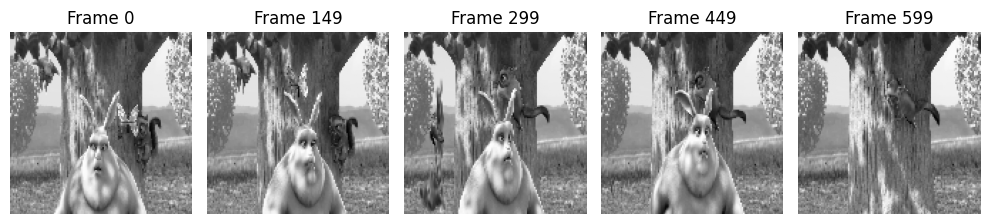

In [8]:
# Step 4: Visualize some processed frames
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
for i, idx in enumerate(np.linspace(0, len(frames)-1, 5, dtype=int)):
    plt.subplot(1,5,i+1)
    plt.imshow(frames[idx], cmap='gray')
    plt.title(f'Frame {idx}')
    plt.axis('off')
plt.tight_layout()
plt.show()